# Librarias Necessárias

Para a execução deste notebook é necessário instalar todas as librarias usadas no bloco de "imports".
Para instalar podemos usar: "pip install" e dar run ao bloco. Com esta linha de código irá ser instalado nas suas librarias python as librarias necessárias para este notebook.

In [25]:
#pip install pandas_datareader

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt
import pandas as pq
from pylab import rcParams
from matplotlib.ticker import ScalarFormatter

# Escolhemos usar %matplotlib notebook para usufruir da interatividade dos gráficos
%matplotlib notebook

# ATR (Average True Range) - Volatilidade

Para o estudo de volatilidade foi necessário arrnajar uma API que nos fornece-se dados sobre o preço mais alto do dia, o mais baixo, o primeiro e o ultimo. Por isso, neste notebook foi usado a API da Yahoo Finance junto da libraria "pandas_datareader"

Para o calculo de volatilidade (Average True Range) foi usado a fórmula presente neste website: https://www.investopedia.com/terms/a/atr.asp

In [4]:
# data de início dos dados
inicio = dt.datetime(2013, 1, 1)

# criação de dataframes com os dados do website Yahoo Finance, usando a libraria "pandas_datareader" para as moedas BTC, ETH e ADA
btcusd = pdr.get_data_yahoo("BTC-USD", inicio)
ethusd = pdr.get_data_yahoo("ETH-USD", inicio)
adausd = pdr.get_data_yahoo("ADA-USD", inicio)

In [5]:
btcusd.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014


In [26]:
btcusd.to_csv("YahooFinance_bitcoin_price_volume_20140916_20210528.csv")

In [6]:
ethusd.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-06,3.536610,2.521120,2.831620,2.772120,164329.0,2.772120
2015-08-07,2.798810,0.714725,2.793760,0.753325,674188.0,0.753325
2015-08-08,0.879810,0.629191,0.706136,0.701897,532170.0,0.701897
2015-08-09,0.729854,0.636546,0.713989,0.708448,405283.0,0.708448
2015-08-10,1.131410,0.663235,0.708087,1.067860,1463100.0,1.067860


In [27]:
ethusd.to_csv("YahooFinance_ethereum_price_volume_20150806_20210528.csv")

In [7]:
adausd.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-30,0.032226,0.017354,0.021678,0.024969,50068700.0,0.024969
2017-10-01,0.030088,0.019969,0.024607,0.025932,57641300.0,0.025932
2017-10-02,0.027425,0.020690,0.025757,0.020816,16997800.0,0.020816
2017-10-03,0.022806,0.020864,0.020864,0.021931,9000050.0,0.021931
2017-10-04,0.022154,0.020859,0.021951,0.021489,5562510.0,0.021489


In [28]:
adausd.to_csv("YahooFinance_cardano_price_volume_20170930_20210528.csv")

In [9]:
# variável da diferença entre o peço mais alto do dia e do preço mais baixo
btc_high_low = btcusd["High"] - btcusd["Low"]

# np.abs para obter o numero abosoluto do cálculo
# variável da diferença entre o peço mais alto do dia e o último preço do dia
btc_high_prevClose = np.abs(btcusd["High"] - btcusd["Close"].shift())

# variável da diferença entre o peço mais baixo do dia e o último preço do dia
btc_low_prevClose = np.abs(btcusd["Low"] - btcusd["Close"].shift())

In [24]:
# Criação de dataframe com as variáveis criadas anteriormente
df_btc = pq.concat([btc_high_low, btc_high_prevClose, btc_low_prevClose], axis = 1)

# Cálculo da volatilidade em máxima de preço
btc_true_range = np.max(df_btc, axis=1)

# Rolling(30).mean() para calcular a volatilidade média durante 14 dias
btc_avg_true_range = btc_true_range.rolling(14).mean()

<IPython.core.display.Javascript object>


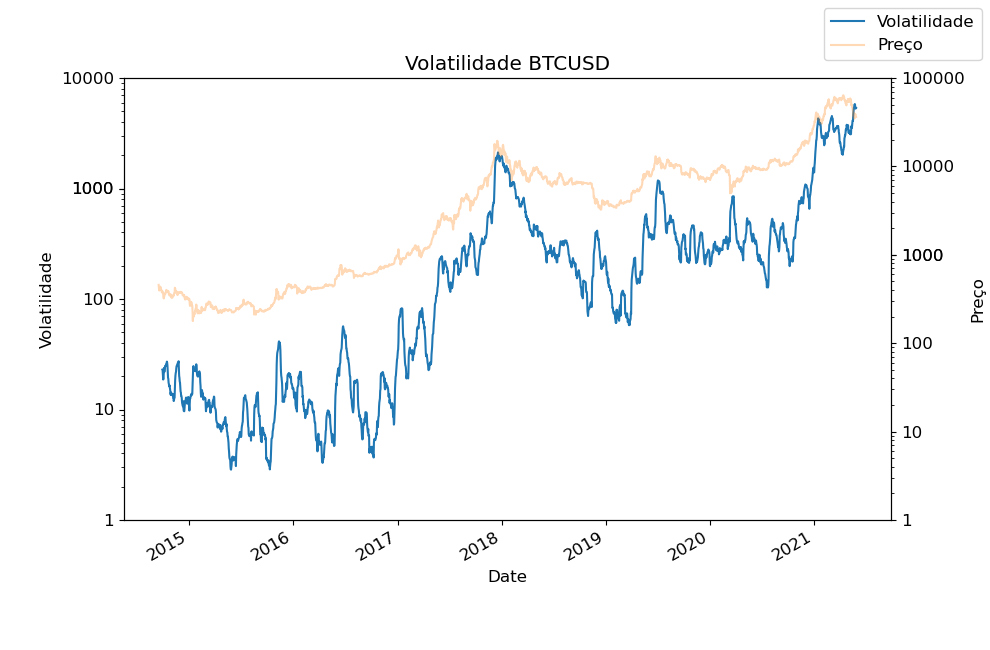

Text(0.5, 1.0, 'Volatilidade BTCUSD')

In [19]:
fig, ax = plt.subplots()

ax1 = btc_avg_true_range.plot(label="Volatilidade")
ax1.set_ylabel("Volatilidade")
ax1.set_yscale("log")
ax1.set_yticks([1, 10, 100, 1000, 1000, 10000])

ax2 = btcusd["Close"].plot(label="Preço", secondary_y=True, alpha=0.3)
ax2.set_ylabel("Preço")
ax2.set_yscale("log")
ax2.set_yticks([1, 10, 100, 1000, 1000, 10000, 100000])

# rcParams neste caso serve para controlar o tamanho da imagem renderizada e do texto
rcParams['figure.figsize'] = 9.9, 6.5
rcParams['font.size'] = 12
rcParams['figure.dpi'] = 100

# as 4 linhas de código abaixo foram necessárias para não usar notação cientifica nas labels do gráfico de preço
ax1.get_yaxis().set_major_formatter(ScalarFormatter())
ax1.ticklabel_format(axis="y", style='plain')
ax2.get_yaxis().set_major_formatter(ScalarFormatter())
ax2.ticklabel_format(axis="y", style='plain')

fig.legend()
plt.title("Volatilidade BTCUSD")

In [15]:
# variável da diferença entre o peço mais alto do dia e do preço mais baixo
eth_high_low = ethusd["High"] - ethusd["Low"]

# np.abs para obter o numero abosoluto do cálculo
# variável da diferença entre o peço mais alto do dia e o último preço do dia
eth_high_prevClose = np.abs(ethusd["High"] - ethusd["Close"].shift())

# variável da diferença entre o peço mais baixo do dia e o último preço do dia
eth_low_prevClose = np.abs(ethusd["Low"] - ethusd["Close"].shift())

In [20]:
# Criação de dataframe com as variáveis criadas anteriormente
df_eth = pq.concat([eth_high_low, eth_high_prevClose, eth_low_prevClose], axis = 1)

# Cálculo da volatilidade em máxima de preço
eth_true_range = np.max(df_eth, axis=1)

# Rolling(30).mean() para calcular a volatilidade média durante 14 dias
eth_avg_true_range = eth_true_range.rolling(14).mean()

<IPython.core.display.Javascript object>


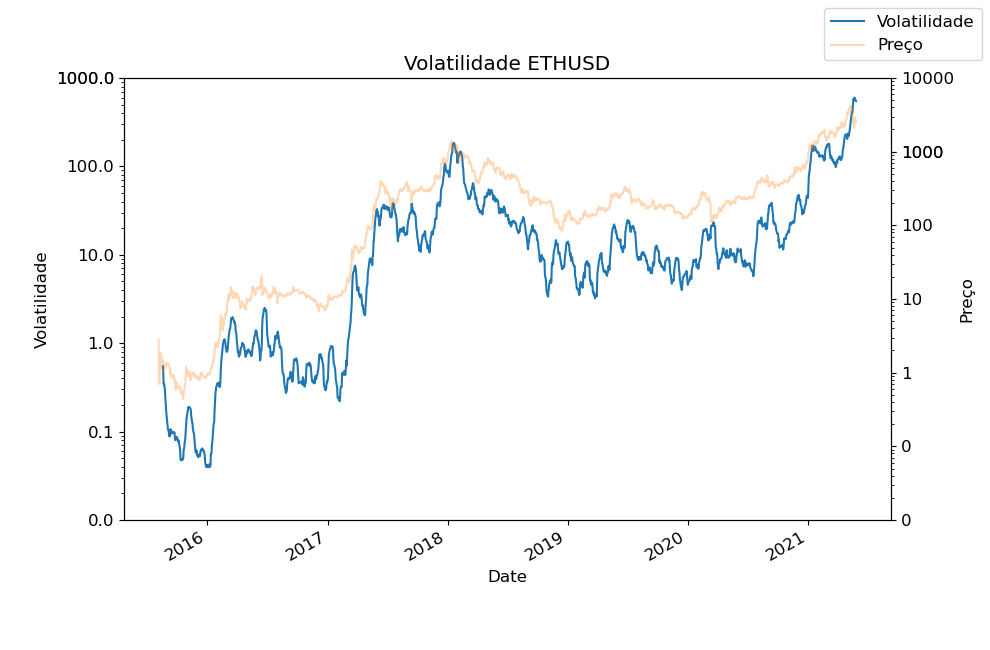

Text(0.5, 1.0, 'Volatilidade ETHUSD')

In [21]:
fig, ax = plt.subplots()
ax1 = eth_avg_true_range.plot(label="Volatilidade", ax=ax)
ax1.set_ylabel("Volatilidade")
ax1.set_yscale("log")
ax1.set_yticks([0.01, 0.1, 1, 10, 100, 1000, 1000])

ax2 = ethusd["Close"].plot(label="Preço", ax=ax, secondary_y=True, alpha=0.3)
ax2.set_ylabel("Preço")
ax2.set_yscale("log")
ax2.set_yticks([0.01, 0.1, 1, 10, 100, 1000, 1000, 10000])

# as 4 linhas de código abaixo foram necessárias para não usar notação cientifica nas labels do gráfico de preço
ax1.get_yaxis().set_major_formatter(ScalarFormatter())
ax1.ticklabel_format(axis="y", style='plain')
ax2.get_yaxis().set_major_formatter(ScalarFormatter())
ax2.ticklabel_format(axis="y", style='plain')

fig.legend()
plt.title("Volatilidade ETHUSD")

In [16]:
# variável da diferença entre o peço mais alto do dia e do preço mais baixo
ada_high_low = adausd["High"] - adausd["Low"]

# np.abs para obter o numero abosoluto do cálculo
# variável da diferença entre o peço mais alto do dia e o último preço do dia
ada_high_prevClose = np.abs(adausd["High"] - adausd["Close"].shift())

# variável da diferença entre o peço mais baixo do dia e o último preço do dia
ada_low_prevClose = np.abs(adausd["Low"] - adausd["Close"].shift())

In [22]:
# Criação de dataframe com as variáveis criadas anteriormente
df_ada = pq.concat([ada_high_low, ada_high_prevClose, ada_low_prevClose], axis = 1)

# Cálculo da volatilidade em máxima de preço
ada_true_range = np.max(df_ada, axis=1)

# Rolling(30).mean() para calcular a volatilidade média durante 14 dias
ada_avg_true_range = ada_true_range.rolling(14).mean()

<IPython.core.display.Javascript object>


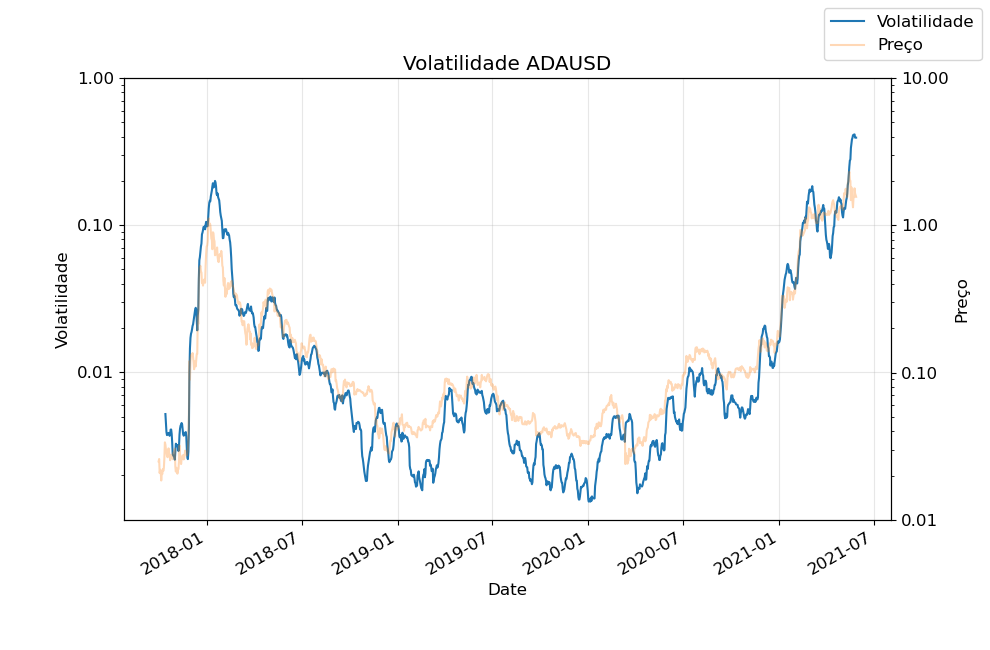

Text(0.5, 1.0, 'Volatilidade ADAUSD')

In [23]:
fig, ax = plt.subplots()
ax1 = ada_avg_true_range.plot(label="Volatilidade", ax=ax)
ax1.set_ylabel("Volatilidade")
ax1.set_yscale("log")
ax1.set_yticks([0.01, 0.1, 1])

ax2 = adausd["Close"].plot(label="Preço", ax=ax, secondary_y=True, alpha=0.3)
ax2.set_ylabel("Preço")
ax2.set_yscale("log")
ax2.set_yticks([0.01, 0.1, 1, 10])

# as 4 linhas de código abaixo foram necessárias para não usar notação cientifica nas labels do gráfico de preço
ax1.get_yaxis().set_major_formatter(ScalarFormatter())
ax1.ticklabel_format(axis="y", style='plain')
ax2.get_yaxis().set_major_formatter(ScalarFormatter())
ax2.ticklabel_format(axis="y", style='plain')

ax.grid(alpha=0.3)
fig.legend()
plt.title("Volatilidade ADAUSD")